### Load Images

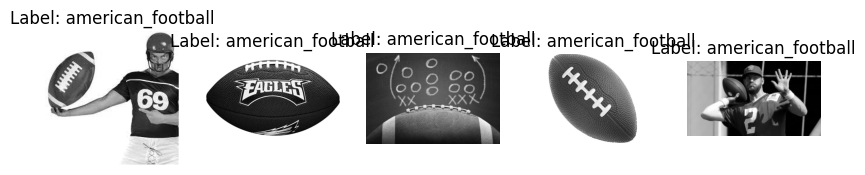

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import cv2
import os


# Function to load images and labels from a directory
def load_images(folder, n=None):
    images = []
    labels = []
    for label_folder in os.listdir(folder):
        count = 0
        label_path = os.path.join(folder, label_folder)
        if os.path.isdir(label_path):
            for img_file in glob(os.path.join(label_path, "*.jpg")):
                if n is not None and count >= n:
                    continue
                img = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
                images.append(img)
                labels.append(label_folder)
                count += 1

    assert len(images) == len(labels), "Mismatch in number of images and labels"


    # labels = utils.to_categorical(labels, len(os.listdir(folder)))
    return images, labels

# Load images and labels from train and test folders
train_images, train_labels = load_images("data/train", 10)
# test_images, test_labels = load_images("data/test")

# display some sample images with their labels
num_samples = 5
plt.figure(figsize=(10, 2))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()

### Circle Detection

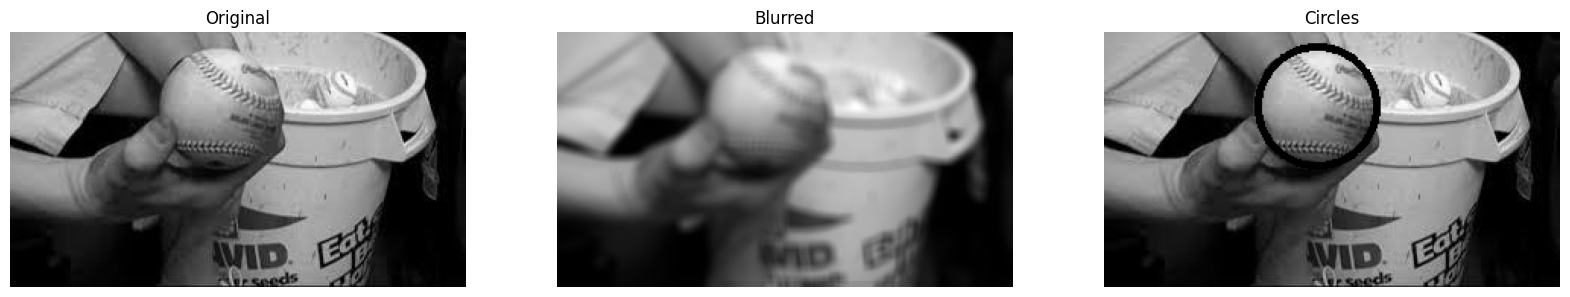

array([[140,  49,  39]])

In [ ]:
import cv2


def detect_circle(image):
    blurred_image = cv2.blur(image, (7, 7))

    circles = cv2.HoughCircles(
        blurred_image,
        cv2.HOUGH_GRADIENT,
        dp=1.2,
        minDist=20,
        param1=50,
        param2=60,
        minRadius=10,
        maxRadius=100
    )
    circle_image = image.copy()
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, r) in circles:
            cv2.circle(circle_image, (x, y), r, (0, 255, 0), 4)

    image_list = {
        "Original" : image, 
        "Blurred" :  blurred_image, 
        "Circles" : circle_image
    }

    plt.figure(figsize=(20, 4))
    for i, (name, img) in enumerate(image_list.items()):
        plt.subplot(1, 3, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(name)
        plt.axis('off')

    plt.show()

    return circles


detect_circle(train_images[15])


### Crop to ball

### CNN

In [55]:
import keras
import keras.models
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from keras import regularizers


def train_model(input_x, input_y, epochs):
    model = keras.Sequential()

    # convolutional layer 1
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(None, None, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # convolutional layer 2
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # convolutional layer 3
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # dropout layer
    model.add(Dropout(0.5))

    # flatten the output
    # model.add(Flatten())

    # fully connected layer
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    # output layer
    model.add(Dense(10, activation='softmax'))

    # compile the model and print summary
    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
    model.summary()

    # train the model
    history = model.fit(input_x, input_y, batch_size=128, epochs=epochs, validation_split=0.2)
    model.save("mnist_cnn.keras")
    return model, history

assert train_images.shape[0] == train_labels.shape[0], "Mismatch in number of training samples"
assert test_images.shape[0] == test_labels.shape[0], "Mismatch in number of testing samples"

epochs = 3
model, history = train_model(train_images, test_images, epochs)

AttributeError: 'list' object has no attribute 'shape'